In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import glob

#!pip install seaborn
import seaborn as sns


In [3]:
labels = pd.read_csv('../data/raw/unbalanced_train_segments.csv',header=2, quotechar=r'"',skipinitialspace=True)
gunshot_labels = pd.read_csv('../data/raw/classes/gunshot_labels.csv',names=['num','label','description'])
print(gunshot_labels)

   num       label       description
0  426   /m/014zdl         Explosion
1  427   /m/032s66  Gunshot, gunfire
2  428    /m/04zjc       Machine gun
3  429  /m/02z32qm         Fusillade
4  430     /m/0_1c    Artillery fire
5  431   /m/073cg4           Cap gun


In [4]:
g_str = '|'.join(gunshot_labels['label'].values)
print(g_str)

/m/014zdl|/m/032s66|/m/04zjc|/m/02z32qm|/m/0_1c|/m/073cg4


In [6]:
firework_labels = pd.read_csv('../data/raw/classes/fireworks.csv', names = ['num', 'label', 'description'])

In [7]:
print(firework_labels)

   num        label  description
0  432     /m/0g6b5    Fireworks
1  433  /g/122z_qxw  Firecracker
2  434   /m/07qsvvw   Burst, pop


In [8]:
f_str = '|'.join(firework_labels['label'].values)

In [9]:
print(f_str)

/m/0g6b5|/g/122z_qxw|/m/07qsvvw


In [10]:
#Now that you have the f_str and g_str; check if each row in the unbalanced_train_segments.csv has a subset of 
#f_str or g_str string values. If yes, append 1 for that row else append 0 for that row. 

In [11]:
background_labels = pd.read_csv('../data/raw/classes/background.csv', names = ['num', 'label', 'description'])
print(background_labels)

    num       label                 description
0   506  /t/dd00125          Inside, small room
1   507  /t/dd00126  Inside, large room or hall
2   508  /t/dd00127        Inside, public space
3   509  /t/dd00128   Outside, urban or manmade
4   510  /t/dd00129   Outside, rural or natural
5   511   /m/01b9nn               Reverberation
6   512   /m/01jnbd                        Echo
7   513   /m/096m7z                       Noise
8   514  /m/06_y0by         Environmental noise
9   515  /m/07rgkc5                      Static
10  516   /m/06xkwv                   Mains hum
11  517   /m/0g12c5                  Distortion
12  518   /m/08p9q4                    Sidetone
13  519  /m/07szfh9                   Cacophony
14  520    /m/0chx_                 White noise
15  521    /m/0cj0r                  Pink noise
16  522  /m/07p_0gm                   Throbbing
17  523   /m/01jwx6                   Vibration
18  524    /m/07c52                  Television
19  525    /m/06bz3                     

In [12]:
b_str = '|'.join(background_labels['label'].values)

In [13]:
print(b_str)

/t/dd00125|/t/dd00126|/t/dd00127|/t/dd00128|/t/dd00129|/m/01b9nn|/m/01jnbd|/m/096m7z|/m/06_y0by|/m/07rgkc5|/m/06xkwv|/m/0g12c5|/m/08p9q4|/m/07szfh9|/m/0chx_|/m/0cj0r|/m/07p_0gm|/m/01jwx6|/m/07c52|/m/06bz3|/m/07hvw1


In [14]:
labels['fireworks'] = labels['positive_labels'].str.contains(f_str) & ~labels['positive_labels'].str.contains(g_str) & ~labels['positive_labels'].str.contains(b_str) 

In [15]:
print(labels)

              # YTID  start_seconds  end_seconds  \
0        ---1_cCGK4M            0.0         10.0   
1        ---2_BBVHAA           30.0         40.0   
2        ---B_v8ZoBY           30.0         40.0   
3        ---EDNidJUA           30.0         40.0   
4        ---N4cFAE1A           21.0         31.0   
5        ---fcVQUf3E           30.0         40.0   
6        ---g9OGAhwc           30.0         40.0   
7        ---lTs1dxhU           30.0         40.0   
8        ---mO--kRQk           30.0         40.0   
9        ---qub7uxgs           30.0         40.0   
10       ---yQzzLcFU           30.0         40.0   
11       --04kMEQOAs            0.0         10.0   
12       --0AzKXCHj8           22.0         32.0   
13       --0B3G_C3qc           10.0         20.0   
14       --0CNhurbZE           30.0         40.0   
15       --0F7kbzAMA           30.0         40.0   
16       --0FMNFsVeg           30.0         40.0   
17       --0MF9K5N30           30.0         40.0   
18       --0

In [16]:
labels['gunshots'] = labels['positive_labels'].str.contains(g_str) & ~labels['positive_labels'].str.contains(f_str) & ~labels['positive_labels'].str.contains(b_str)
print(labels)

              # YTID  start_seconds  end_seconds  \
0        ---1_cCGK4M            0.0         10.0   
1        ---2_BBVHAA           30.0         40.0   
2        ---B_v8ZoBY           30.0         40.0   
3        ---EDNidJUA           30.0         40.0   
4        ---N4cFAE1A           21.0         31.0   
5        ---fcVQUf3E           30.0         40.0   
6        ---g9OGAhwc           30.0         40.0   
7        ---lTs1dxhU           30.0         40.0   
8        ---mO--kRQk           30.0         40.0   
9        ---qub7uxgs           30.0         40.0   
10       ---yQzzLcFU           30.0         40.0   
11       --04kMEQOAs            0.0         10.0   
12       --0AzKXCHj8           22.0         32.0   
13       --0B3G_C3qc           10.0         20.0   
14       --0CNhurbZE           30.0         40.0   
15       --0F7kbzAMA           30.0         40.0   
16       --0FMNFsVeg           30.0         40.0   
17       --0MF9K5N30           30.0         40.0   
18       --0

In [17]:
labels['background'] = labels['positive_labels'].str.contains(b_str) & ~labels['positive_labels'].str.contains(g_str) & ~labels['positive_labels'].str.contains(f_str)
print(labels)

              # YTID  start_seconds  end_seconds  \
0        ---1_cCGK4M            0.0         10.0   
1        ---2_BBVHAA           30.0         40.0   
2        ---B_v8ZoBY           30.0         40.0   
3        ---EDNidJUA           30.0         40.0   
4        ---N4cFAE1A           21.0         31.0   
5        ---fcVQUf3E           30.0         40.0   
6        ---g9OGAhwc           30.0         40.0   
7        ---lTs1dxhU           30.0         40.0   
8        ---mO--kRQk           30.0         40.0   
9        ---qub7uxgs           30.0         40.0   
10       ---yQzzLcFU           30.0         40.0   
11       --04kMEQOAs            0.0         10.0   
12       --0AzKXCHj8           22.0         32.0   
13       --0B3G_C3qc           10.0         20.0   
14       --0CNhurbZE           30.0         40.0   
15       --0F7kbzAMA           30.0         40.0   
16       --0FMNFsVeg           30.0         40.0   
17       --0MF9K5N30           30.0         40.0   
18       --0

In [17]:
# labels['other'] = True
# print(labels)

              # YTID  start_seconds  end_seconds  \
0        ---1_cCGK4M            0.0         10.0   
1        ---2_BBVHAA           30.0         40.0   
2        ---B_v8ZoBY           30.0         40.0   
3        ---EDNidJUA           30.0         40.0   
4        ---N4cFAE1A           21.0         31.0   
5        ---fcVQUf3E           30.0         40.0   
6        ---g9OGAhwc           30.0         40.0   
7        ---lTs1dxhU           30.0         40.0   
8        ---mO--kRQk           30.0         40.0   
9        ---qub7uxgs           30.0         40.0   
10       ---yQzzLcFU           30.0         40.0   
11       --04kMEQOAs            0.0         10.0   
12       --0AzKXCHj8           22.0         32.0   
13       --0B3G_C3qc           10.0         20.0   
14       --0CNhurbZE           30.0         40.0   
15       --0F7kbzAMA           30.0         40.0   
16       --0FMNFsVeg           30.0         40.0   
17       --0MF9K5N30           30.0         40.0   
18       --0

In [18]:
# labels['other'] = labels['other'] & ~labels['positive_labels'].str.contains(b_str) & ~labels['positive_labels'].str.contains(g_str) & ~labels['positive_labels'].str.contains(f_str)
# print(labels)

              # YTID  start_seconds  end_seconds  \
0        ---1_cCGK4M            0.0         10.0   
1        ---2_BBVHAA           30.0         40.0   
2        ---B_v8ZoBY           30.0         40.0   
3        ---EDNidJUA           30.0         40.0   
4        ---N4cFAE1A           21.0         31.0   
5        ---fcVQUf3E           30.0         40.0   
6        ---g9OGAhwc           30.0         40.0   
7        ---lTs1dxhU           30.0         40.0   
8        ---mO--kRQk           30.0         40.0   
9        ---qub7uxgs           30.0         40.0   
10       ---yQzzLcFU           30.0         40.0   
11       --04kMEQOAs            0.0         10.0   
12       --0AzKXCHj8           22.0         32.0   
13       --0B3G_C3qc           10.0         20.0   
14       --0CNhurbZE           30.0         40.0   
15       --0F7kbzAMA           30.0         40.0   
16       --0FMNFsVeg           30.0         40.0   
17       --0MF9K5N30           30.0         40.0   
18       --0

In [19]:
# lets store the unbalanced_train_segments which are tagged [gunshots,fireworks,background or noise]
# as unbalanced_train_tagged.csv
labels.to_csv(r'../data/preprocessed/unbalanced_train_tagged.csv')



In [20]:
#Checking out whats the distribution of the classes in the training dataset

labels = pd.read_csv(r'../data/raw/unbalanced_train_segments.csv', header = 2, quotechar = r'"', skipinitialspace=True)
labels['gunshots'] = labels['positive_labels'].str.contains(g_str)
labels['fireworks'] = labels['positive_labels'].str.contains(f_str)
labels['background'] = labels['positive_labels'].str.contains(b_str)
labels['other'] = True
labels['other'] = labels['other'] & ~labels['positive_labels'].str.contains(b_str) & ~labels['positive_labels'].str.contains(g_str) & ~labels['positive_labels'].str.contains(f_str)

gun_positive = labels[labels['gunshots']==True]
fireworks_positive = labels[labels['fireworks']==True]
background_positive = labels[labels['background']== True]
other_positive = labels[labels['other']==True]

d = {'Class' : ['Gunshots','Fireworks','Background','Other'], 'Total_samples' : [gun_positive.shape[0],fireworks_positive.shape[0],background_positive.shape[0],other_positive.shape[0]]}
train_df = pd.DataFrame(data=d)
train_df

,Class,Total_samples
0,Gunshots,8831
1,Fireworks,5708
2,Background,194974
3,Other,1833813


In [21]:
#Checking out whats the distribution of the classes in the evaluation dataset

labels = pd.read_csv(r'../data/raw/eval_segments.csv', header = 2, quotechar = r'"', skipinitialspace=True)
labels['gunshots'] = labels['positive_labels'].str.contains(g_str)
labels['fireworks'] = labels['positive_labels'].str.contains(f_str)
labels['background'] = labels['positive_labels'].str.contains(b_str)
labels['other'] = True
labels['other'] = labels['other'] & ~labels['positive_labels'].str.contains(b_str) & ~labels['positive_labels'].str.contains(g_str) & ~labels['positive_labels'].str.contains(f_str)

gun_positive = labels[labels['gunshots']==True]
fireworks_positive = labels[labels['fireworks']==True]
background_positive = labels[labels['background']== True]
other_positive = labels[labels['other']==True]

d = {'Class' : ['Gunshots','Fireworks','Background','Other'], 'Total_samples' : [gun_positive.shape[0],fireworks_positive.shape[0],background_positive.shape[0],other_positive.shape[0]]}
df = pd.DataFrame(data=d)
df


,Class,Total_samples
0,Gunshots,292
1,Fireworks,161
2,Background,2053
3,Other,17890


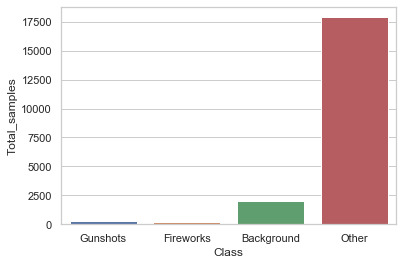

In [22]:

sns.set(style="whitegrid")
sns.barplot(x='Class', y='Total_samples', data=df.reset_index())

In [23]:
#Creating an evaluation or Validation dataset. Make sure the validation set are equal and randomly sampled.
#output: tfrecord file which has YTID, start, end and positive labels of gun, fireworks, background and other.

labels = pd.read_csv('../data/raw/eval_segments.csv', header = 2, quotechar = r'"', skipinitialspace=True)
labels['gunshots'] = labels['positive_labels'].str.contains(g_str)
labels['fireworks'] = labels['positive_labels'].str.contains(f_str)
labels['background'] = labels['positive_labels'].str.contains(b_str)
labels['other'] = True
labels['other'] = labels['other'] & ~labels['positive_labels'].str.contains(b_str) & ~labels['positive_labels'].str.contains(g_str) & ~labels['positive_labels'].str.contains(f_str)


# We found that there are 292 gun samples, 161 fireworks, 2053 background, 17890 Other  class in Evaluation set. 
# Lets make an evaluation dataset of 161 samples of each class. 

fireworks_positive = labels[labels['fireworks']==True]
gun_positive = labels[labels['gunshots']==True].sample(fireworks_positive.shape[0])
background_positive = labels[labels['background']==True].sample(fireworks_positive.shape[0])
other_positive = labels[labels['other']==True].sample(fireworks_positive.shape[0])

subset = gun_positive.append(fireworks_positive, ignore_index=True)
subset = subset.append(background_positive, ignore_index=True)
subset = subset.append(other_positive,ignore_index=True)

print(subset)
print(subset.shape[0])

subset['first2'] = subset['# YTID'].str[:2]
sorted_subset = subset.sort_values(by=['first2'])
print(sorted_subset)
print('length of the subset is ', len(sorted_subset))

raw_dir = '../data/raw/audioset_v1_embeddings/eval'
writer = tf.python_io.TFRecordWriter('../data/preprocessed/eval_spotting_gunshots_subset.tfrecord')
i=0 
while i<len(sorted_subset):
    first2 = sorted_subset['first2'][i]
    ytids = set([sorted_subset['# YTID'][i]])
    while sorted_subset['first2'][i+1] == first2:
        i += 1
        ytids.add(sorted_subset['# YTID'][i])
    if os.path.exists(f'{raw_dir}/{first2}.tfrecord'):
        fn = f'{raw_dir}/{first2}.tfrecord'
    else:
        fn = f'{raw_dir}/{first2}-1.tfrecord'
    for example in tf.python_io.tf_record_iterator(fn):
        tf_example = tf.train.Example.FromString(example)
        if tf_example.features.feature['video_id'].bytes_list.value[0].decode(encoding='UTF-8'):
            writer.write(example)
            # Add the whole details in a new tfrecord file
            i=i+1
writer.close()


          # YTID  start_seconds  end_seconds  \
0    cqeVEFFzz7E          110.0        120.0   
1    Tc9sb71px5I           30.0         40.0   
2    1xRv-LwycNA          170.0        180.0   
3    HlQGcyG-xDM           30.0         40.0   
4    YkN8deaLEiM            0.0         10.0   
5    1vByeH2oiHU          260.0        270.0   
6    ZV66H3TvZGE            0.0         10.0   
7    ldVtte9jK-s           30.0         40.0   
8    PrWy40DYZQU           30.0         40.0   
9    D8z7jRhS_o4          490.0        500.0   
10   JcqeR7BgSUQ           10.0         20.0   
11   qxyUl9M_7vc          110.0        120.0   
12   lFW75PAEAaI          250.0        260.0   
13   -inB65exXFU           30.0         40.0   
14   QS31Gm9tIig            0.0         10.0   
15   QOqlkqTR82Q            0.0         10.0   
16   V-lj5QvZYBo           30.0         40.0   
17   7RlyBtFDd98           70.0         80.0   
18   B8_Y9qmHFWQ           30.0         40.0   
19   Cp27zx62zRE           30.0         

NameError: name 'os' is not defined

In [60]:
# !pip install tqdm

     |████████████████████████████████| 51kB 1.1MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [24]:
from tqdm import tqdm

In [26]:
# Now open the unbalanced_train data 
labels = pd.read_csv('../data/raw/unbalanced_train_segments.csv',header=2, quotechar=r'"',skipinitialspace=True)

In [27]:
print(labels.shape[0])

2041789


In [28]:
labels['gunshots'] = labels['positive_labels'].str.contains(g_str)
labels['fireworks'] = labels['positive_labels'].str.contains(f_str)
labels['background'] = labels['positive_labels'].str.contains(b_str)
labels['other'] = True
labels['other'] = labels['other'] & ~labels['positive_labels'].str.contains(b_str) & ~labels['positive_labels'].str.contains(g_str) & ~labels['positive_labels'].str.contains(f_str)

fireworks_positive = labels[labels['fireworks']==True]
print(fireworks_positive.shape[0])
gun_positive = labels[labels['gunshots']==True].sample(fireworks_positive.shape[0])
print(gun_positive.shape[0])
background_positive = labels[labels['background']==True].sample(fireworks_positive.shape[0])
print(background_positive.shape[0])
other_positive = labels[labels['other']==True].sample(fireworks_positive.shape[0])
print(other_positive.shape[0])

#firework samples = 5708, gunshot samples = 8831 , background_samples = 194974, other = 1833813
#There is a strong class imbalance in this problem. Therefore, for now,we will handle this class
#imbalance by making sure all classes is of size fireworks. 

subset = gun_positive.append(fireworks_positive, ignore_index=True)
subset = subset.append(background_positive, ignore_index=True)
subset = subset.append(other_positive,ignore_index=True)

print(subset)
print(subset.shape[0])

subset['first2'] = subset['# YTID'].str[:2]
sorted_subset = subset.sort_values(by=['first2'])
print(sorted_subset)
print('length of the subset is ', len(sorted_subset))

raw_dir = '../data/raw/audioset_v1_embeddings/unbal_train'
writer = tf.python_io.TFRecordWriter('../data/preprocessed/unbaltrain_spotting_gunshots_subset.tfrecord')
i=0 
while i<len(sorted_subset):
    first2 = sorted_subset['first2'][i]
    ytids = set([sorted_subset['# YTID'][i]])
    while sorted_subset['first2'][i+1] == first2:
        i += 1
        ytids.add(sorted_subset['# YTID'][i])
    if os.path.exists(f'{raw_dir}/{first2}.tfrecord'):
        fn = f'{raw_dir}/{first2}.tfrecord'
    else:
        fn = f'{raw_dir}/{first2}-1.tfrecord'
    for example in tf.python_io.tf_record_iterator(fn):
        tf_example = tf.train.Example.FromString(example)
        if tf_example.features.feature['video_id'].bytes_list.value[0].decode(encoding='UTF-8'):
            writer.write(example)  # Add the whole details in a new tfrecord file
            i=i+1
writer.close()


5708
5708
5708
5708
            # YTID  start_seconds  end_seconds  \
0      S_Am-UNJ1nw           10.0         20.0   
1      oAZyfKu7-nY          320.0        330.0   
2      B8DA_igm0Pg          210.0        220.0   
3      UQaZqbnIhy0            0.0          7.0   
4      yujyWYodj6s           10.0         20.0   
5      TB8mtypLGck          340.0        350.0   
6      rvs89IfJhNo           30.0         40.0   
7      9ar0j3FoEvo          330.0        340.0   
8      LqwzKfUY2zM           40.0         50.0   
9      qn8tRQmayNs           50.0         60.0   
10     wSklyUOrc6E          230.0        240.0   
11     KCOeGhINjGk           60.0         70.0   
12     9WPiHEv1MRM           30.0         40.0   
13     1S2BISM1lrw            0.0          4.0   
14     eXeh01pX2hw           30.0         40.0   
15     SF5ouPgGFyU            0.0          6.0   
16     8kpd83JCeB8            1.0         11.0   
17     AuMUbOkawts            0.0         10.0   
18     Ic7fuVg9qf0           4

NameError: name 'os' is not defined

In [1]:
## Auxilarry tests: 
#to iterate and see what are the contents in any tf_record file. 

# records = list(tf.python_io.tf_record_iterator('preprocessed_data/bal_spotgun_subset.tfrecord'))
# print(len(records))
# i=0
# for example in records:
#     tf_example = tf.train.Example.FromString(example)
#     audio_mbed = tf_example.feature_list['audio_embedding']
#     print("record number")
#     print(i)
#     print(tf_example)
#     print(audio_mbed)
#     i = i+1

# #vid_id = tf_example.features.feature['video_id'].bytes_list.value[0].decode(encoding = 'UTF-8')
# #audio_mbed = tf_example.feature_lists.feature_list['audio_embedding']